# World Happiness
This analysis is about the World Happiness. This report give us information about the "perceived happiness" of 153 countries, by a general rank, justified by single score on various parametres, as Economy, Health..

### Dataset
These records concern 2015-2020, therefore there are six files, one for each year. Not all these files has the same columns, but the common ones are:
- Country
- Region
- Happiness Rank
- Happiness Score
- Economy (GDP per capita)
- Family
- Health
- Freedom
- Trsust (Government Corruption)
- Generosity
- Dystopia Residual

### Questions
1) Which are the ten least happy countries of 2020? <br />
2) Which are the ten happiest countries of 2020? <br /> 
3) What is the trend of happiness about a single country in 2015-2020?  <br />
4) What is the correlation between the parametres in 2020? <br />

## Let's start
First of all, we need to import all the modules, in particular **Pandas** and **Numpy** for the data manipulation, then **Matplotlib** and **Seaborn** for the data visualization.

In [1]:
# Importing modules

import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

Then we need to import all the dataset that are on the CSV folder. 

In [2]:
# Import datasets

df_2015 = pd.read_csv('CSV/2015.csv')
df_2016 = pd.read_csv('CSV/2016.csv')
df_2017 = pd.read_csv('CSV/2017.csv')
df_2018 = pd.read_csv('CSV/2018.csv')
df_2019 = pd.read_csv('CSV/2019.csv')
df_2020 = pd.read_csv('CSV/2020.csv')

At this point we have to check if there is any null value. By the canonical synstax df.isnull() we'll have the full output with True and False, but as you can imaga, it isn't so easy to check. 

In [15]:
df_2020.isnull()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


An easier way can be the following one: 

In [16]:
df_2020.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Now we're ready for answering to all the questions.

### 1) Which are the ten least happy countries of 2020?
We can get these countries by sorting the dataset by "Ladder score", and get the first 10 records. Now, by seaborn, we can plot the result in an easy barplot, defining the x axe as "Ladder Score", the y axe as "Country name" and givid the filtered dataset with only these ten countries. 

Text(0.5, 1.0, '10 unhappiest countries')

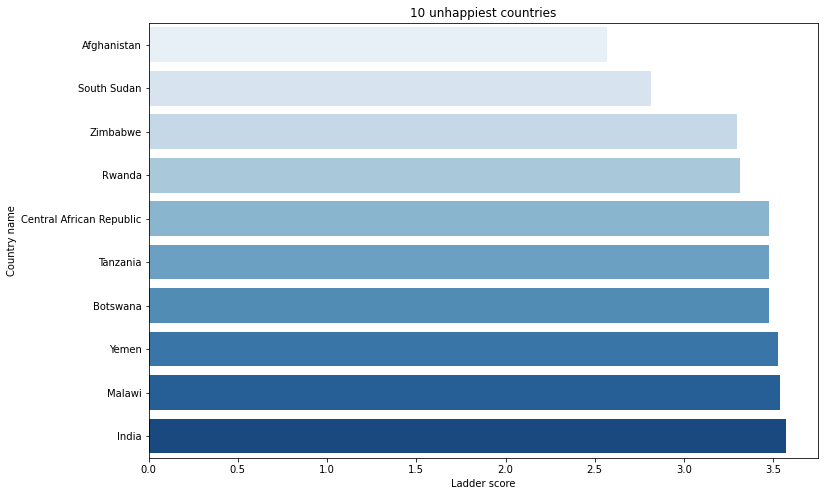

In [3]:
less10 = df_2020.sort_values(by='Ladder score').head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x="Ladder score", y="Country name", data=less10, palette="Blues").set_title("10 unhappiest countries")

### 2) Which are the ten happiest countries of 2020?
This answer is specular to the previous one. In fact, we can get the firsts ten countries just by the attribute ascending=False

Text(0.5, 1.0, '10 happiest countries')

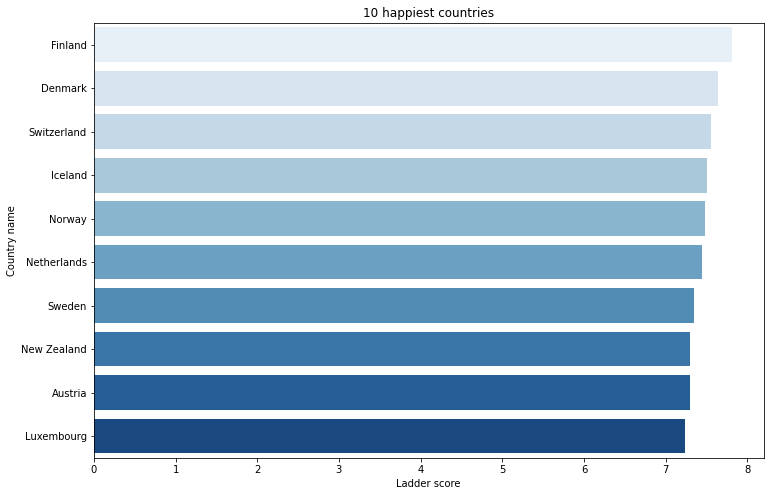

In [4]:
top10 = df_2020.sort_values(by='Ladder score', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x="Ladder score", y="Country name", data=top10, palette="Blues").set_title("10 happiest countries")

### 3) What is the trend of happiness about a single country in 2015-2020? 
For answering to this question we have to get every "score" in our datasets. So we can creare an object with all these record, and then we can create DataFrame with the proper index

For example, we can analize the Italy's trend

Text(0.5, 1.0, 'Italian trend')

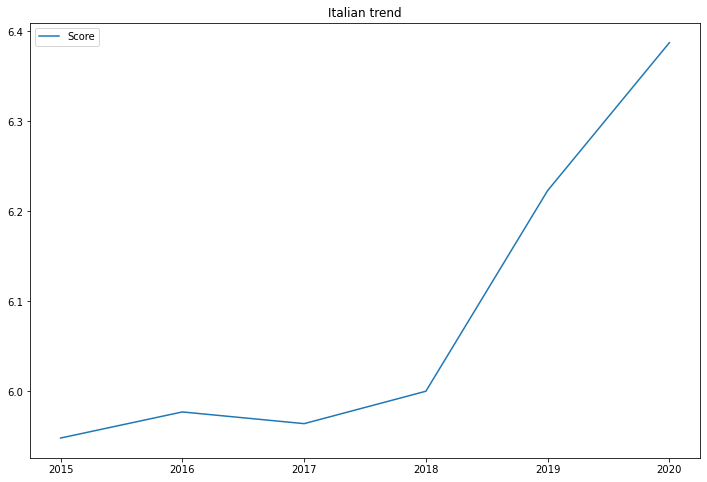

In [73]:
scores_Italy = {'Score': [ df_2015[df_2015["Country"] == "Italy"]["Happiness Score"].item(),
                           df_2016[df_2016["Country"] == "Italy"]["Happiness Score"].item(),
                           df_2017[df_2017["Country"] == "Italy"]["Happiness.Score"].item(),
                           df_2018[df_2018["Country or region"] == "Italy"]["Score"].item(),
                           df_2019[df_2019["Country or region"] == "Italy"]["Score"].item(),
                           df_2020[df_2020["Country name"] == "Italy"]["Ladder score"].item()]
               }
plt.figure(figsize=(12,8))
df = pd.DataFrame(data=scores_Italy, index=[2015,2016,2017,2018,2019,2020])
sns.lineplot(data=df).set_title("Italian trend")
    

Otherwise the Australian's one

Text(0.5, 1.0, 'Australian trend')

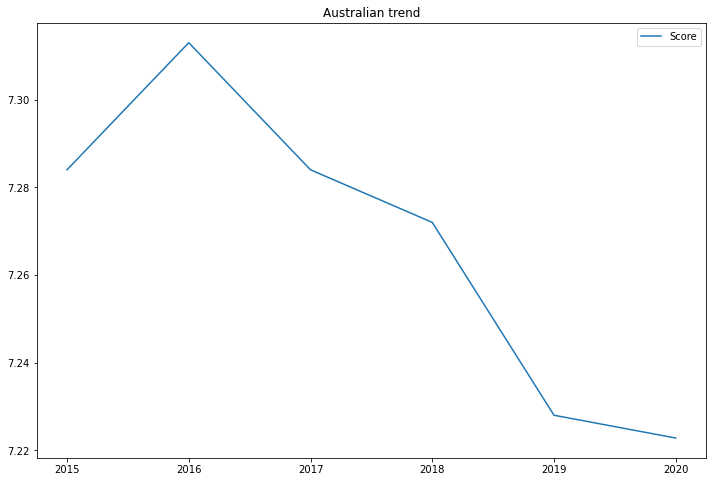

In [74]:
scores_Australia = {'Score': [ df_2015[df_2015["Country"] == "Australia"]["Happiness Score"].item(),
                           df_2016[df_2016["Country"] == "Australia"]["Happiness Score"].item(),
                           df_2017[df_2017["Country"] == "Australia"]["Happiness.Score"].item(),
                           df_2018[df_2018["Country or region"] == "Australia"]["Score"].item(),
                           df_2019[df_2019["Country or region"] == "Australia"]["Score"].item(),
                           df_2020[df_2020["Country name"] == "Australia"]["Ladder score"].item()]
               }
plt.figure(figsize=(12,8))
df = pd.DataFrame(data=scores_Australia, index=[2015,2016,2017,2018,2019,2020])
sns.lineplot(data=df).set_title("Australian trend")

## 4) What is the correlation between the parametres? 
First of all we need to drop some unuseful columns, ad "Standard error of ladder score" et simila. After that, we can watch the correlation by using a simple heatmap. For using the heatmap we need the correlation matrix, and we can easy calculate that as "df.corr()". annot=True allows to show the exactly value of each correlation, and cmap allows to define a particular colors palette. 

<AxesSubplot:>

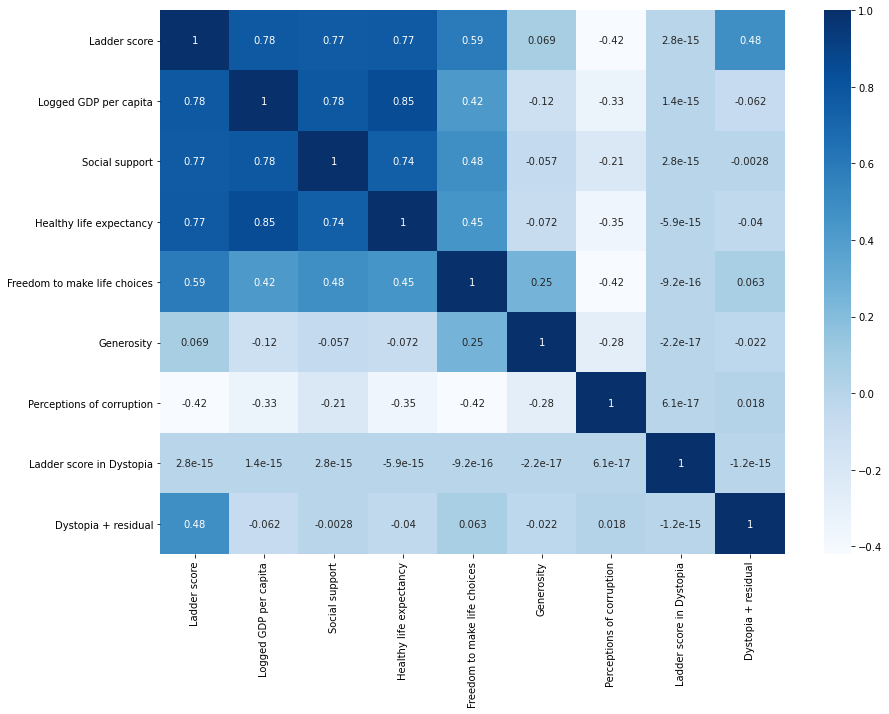

In [85]:
df_2020_cleaned = df_2020.drop(['Standard error of ladder score',
                                'upperwhisker',
                                'lowerwhisker',
                                'Explained by: Log GDP per capita',
                                'Explained by: Freedom to make life choices',
                                'Explained by: Social support',
                                'Explained by: Healthy life expectancy',
                                'Explained by: Generosity',
                                'Explained by: Perceptions of corruption',                           
                          ], axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(df_2020_cleaned.corr(), annot=True, cmap="Blues")

## Conclusion
After this short analysis we can say that the perception of happiness is extremely variable (as we have seen on Italy's and Australian's tred). Then, thanks to the last plot, we can also say that it's not quite true that "money can't buy happiness", in fact the Happiness Score (or Ladder Score) is strongly affected by the "Logged GDP per capita" but also by "Health Life expectancy" and "Social Support".